# Inicialización y configuración

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=5a5439e69fa890a21a4f2249dfb23fda4002ef45fcb888

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [37]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport

import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.utils.class_weight import compute_class_weight
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer,  TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score


import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [5]:
data=pd.read_csv('/content/drive/MyDrive/HotelsReviews.csv', sep=',',index_col=0, encoding = 'utf-8')

# Entendimiento y preparación de los datos

## Descripcion de los datos y columnas

In [6]:
data_t=data
data_t.head(3)

,title,rating,review_text,location,hotel,label
0,Villa Katherina carretera de Cádiz,1,Tanto yo como mi pareja hemos vivido una exper...,Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Villa_Katerina,0
1,Malo,1,Caro y malo. No lo recomiendo. No hay grupo g...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Xanaes,0
2,Finde carisimo,1,Mi marido y yo fuimos a pasar un fin de semana...,Granada_Province_of_Granada_Andalucia,Hotel_Palacio_de_Los_Navas,0


In [7]:
data_t.shape

(5000, 6)

In [8]:
data_t.dtypes

title          object
rating          int64
review_text    object
location       object
hotel          object
label           int64
dtype: object

## Datos numericos

In [9]:
data_t.describe()

,rating,label
count,5000.00000,5000.000000
mean,3.98620,1.103000
std,1.29659,0.797821
min,1.00000,0.000000
25%,3.00000,1.000000
50%,4.00000,1.000000
75%,5.00000,1.000000
max,5.00000,3.000000


## Datos categoricos

In [10]:
data_t['location'].value_counts()

Granada_Province_of_Granada_Andalucia                                     945
Seville_Province_of_Seville_Andalucia                                     933
Cordoba_Province_of_Cordoba_Andalucia                                     788
Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia                         770
Jaen_Province_of_Jaen_Andalucia                                           335
Almeria_Province_of_Almeria_Andalucia                                     260
Huelva_Province_of_Huelva_Andalucia                                        93
znajar_Province_of_Cordoba_Andalucia                                       80
anta_Cruz_del_Comercio_Alhama_de_Granada_Province_of_Granada_Andalucia     29
Malaga_Costa_del_Sol_Province_of_Malaga                                    26
Cabo_de_Gata_Almeria_Province_of_Almeria_Andalucia                         23
Albolote_Province_of_Granada_Andalucia                                     22
Monachil_Sierra_Nevada_National_Park_Province_of_Granada_Andaluc

In [11]:
data_t['hotel'].value_counts()

Carmen_de_Ramilla          32
El_Amparo                  29
Apartamentos_Mauror        29
Hotel_Juleca               26
La_Loma                    26
                           ..
La_magnolia                 1
Eco_Smart_Apartments        1
Casa_Concha_de_Fazahali     1
For_You_Hostel_Sevilla      1
Santa_Ana_Hostal            1
Name: hotel, Length: 704, dtype: int64

In [12]:
data_t.loc[data_t['location'].isnull(), 'location'] = "na"
#data_t = data_t.drop_duplicates()
data_t.shape

(5000, 6)

In [13]:
df_plot = data_t.loc[data_t.rating.isin(data_t.index)]

In [14]:
df_plot.shape

(5000, 6)

## Análisis de datos

In [15]:

textos = data_t.copy()
ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

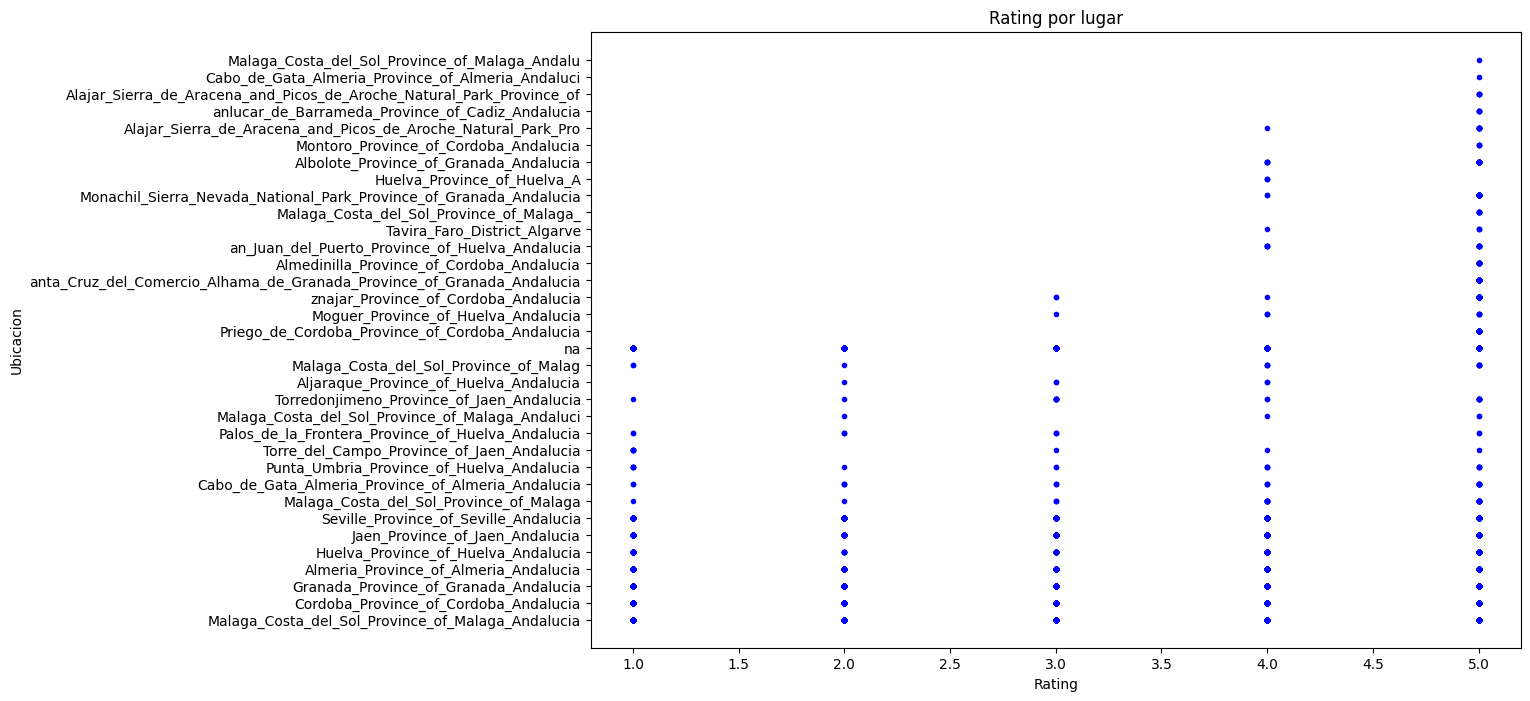

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(df_plot['rating'], df_plot['location'], '.', color = 'blue')
plt.title('Rating por lugar')
plt.xlabel('Rating')  
plt.ylabel('Ubicacion')  
plt.show()

<Figure size 1200x800 with 0 Axes>

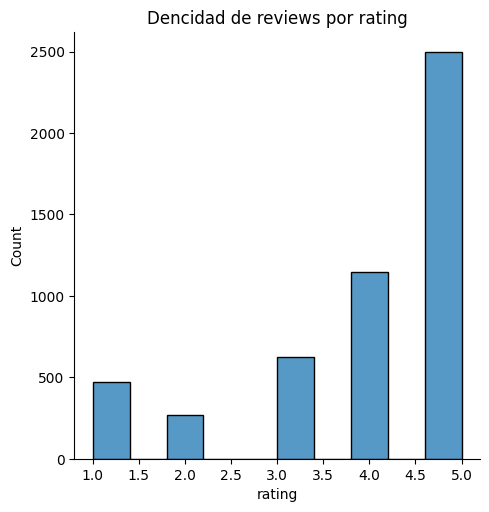

In [17]:
plt.figure(figsize = (12, 8))
plt.tight_layout()
sns.displot(df_plot['rating'], bins = 10)
plt.title('Dencidad de reviews por rating')  
plt.show()

## Transformacion de los datos

Pasar Location a encoded label

<Figure size 1200x800 with 0 Axes>

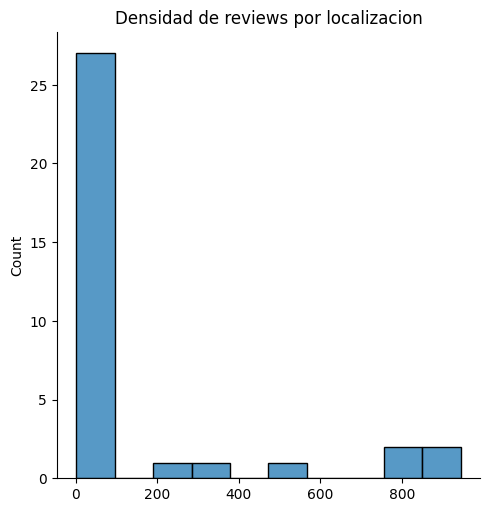

In [18]:
unique_loc = df_plot['location'].unique()
locs = {}
for i in unique_loc:
  locs[i]=0
for i in range(5000):
  locs[df_plot['location'][i]]+=1

plt.figure(figsize = (12, 8))
plt.tight_layout()
sns.displot(locs, bins = 10)
plt.title('Densidad de reviews por localizacion')  
plt.show()
  


Porcentajes por tipos de calificacion

In [19]:
100* data_t['rating'].value_counts()/len(data_t['rating'])

5    49.90
4    22.90
3    12.50
1     9.38
2     5.32
Name: rating, dtype: float64

In [20]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
      new_words.append(word.lower())
    return new_words
      
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stops = set(stopwords.words('spanish'))
    new_words= []
    for word in words:
      if word not in stops:
        new_words.append(word) 
    return new_words


def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [21]:
data_t['words'] = data_t['review_text'].apply(word_tokenize)
data_t['words']= data_t['words'].apply(preprocessing)
data_t.head()

,title,rating,review_text,location,hotel,label,words
0,Villa Katherina carretera de Cádiz,1,Tanto yo como mi pareja hemos vivido una exper...,Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Villa_Katerina,0,"[pareja, vivido, experiencia, horrible, pues, ..."
1,Malo,1,Caro y malo. No lo recomiendo. No hay grupo g...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Xanaes,0,"[caro, malo, recomiendo, grupo, generador, siq..."
2,Finde carisimo,1,Mi marido y yo fuimos a pasar un fin de semana...,Granada_Province_of_Granada_Andalucia,Hotel_Palacio_de_Los_Navas,0,"[marido, pasar, fin, semana, hotel, habian, re..."
3,Una vez y no más.,2,Las comparaciones son odiosas pero he de decir...,Granada_Province_of_Granada_Andalucia,Casa_Palacio_Pilar_del_Toro_Hotel,0,"[comparaciones, odiosas, decir, sido, invitabl..."
4,Nada que ver con las fotos,1,La limpieza de la habitación es muy mala llega...,Almeria_Province_of_Almeria_Andalucia,Hotel_Embajador,0,"[limpieza, habitacion, mala, llegando, dos, ve..."


In [22]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    return [stemmer.stem(token) for token in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, pos='v') for token in words]

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

data_t['words'] = data_t['words'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,title,rating,review_text,location,hotel,label,words
0,Villa Katherina carretera de Cádiz,1,Tanto yo como mi pareja hemos vivido una exper...,Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Villa_Katerina,0,"[parej, vivido, experienc, horr, pue, jacuzz, ..."
1,Malo,1,Caro y malo. No lo recomiendo. No hay grupo g...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Xanaes,0,"[caro, malo, recomiendo, grupo, generad, siqui..."
2,Finde carisimo,1,Mi marido y yo fuimos a pasar un fin de semana...,Granada_Province_of_Granada_Andalucia,Hotel_Palacio_de_Los_Navas,0,"[marido, pas, fin, seman, hotel, hab, recomend..."
3,Una vez y no más.,2,Las comparaciones son odiosas pero he de decir...,Granada_Province_of_Granada_Andalucia,Casa_Palacio_Pilar_del_Toro_Hotel,0,"[comparac, odiosa, decir, sido, invit, compara..."
4,Nada que ver con las fotos,1,La limpieza de la habitación es muy mala llega...,Almeria_Province_of_Almeria_Andalucia,Hotel_Embajador,0,"[limpiez, habitac, mal, llegando, dos, vec, do..."


In [23]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,title,rating,review_text,location,hotel,label,words
0,Villa Katherina carretera de Cádiz,1,Tanto yo como mi pareja hemos vivido una exper...,Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Villa_Katerina,0,parej vivido experienc horr pue jacuzz nunc sa...
1,Malo,1,Caro y malo. No lo recomiendo. No hay grupo g...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Xanaes,0,caro malo recomiendo grupo generad siquier luc...
2,Finde carisimo,1,Mi marido y yo fuimos a pasar un fin de semana...,Granada_Province_of_Granada_Andalucia,Hotel_Palacio_de_Los_Navas,0,marido pas fin seman hotel hab recomendado ubi...
3,Una vez y no más.,2,Las comparaciones son odiosas pero he de decir...,Granada_Province_of_Granada_Andalucia,Casa_Palacio_Pilar_del_Toro_Hotel,0,comparac odiosa decir sido invit compararlo ho...
4,Nada que ver con las fotos,1,La limpieza de la habitación es muy mala llega...,Almeria_Province_of_Almeria_Andalucia,Hotel_Embajador,0,limpiez habitac mal llegando dos vec dos tard ...
...,...,...,...,...,...,...,...
4995,buena situacion. nada es perfecto,3,"el hostal esta bien situado, junto a la mezqui...",na,NaN,3,host bien situado junto mezquit hoy catedr cor...
4996,Centrico y correcto.,3,Llegar es una odisea pues el acceso es a trave...,na,NaN,3,lleg odise pue acceso trav cal peaton mayor di...
4997,"Bien, pero con algunas connotaciones.",3,He pasado alli los últimos tres días. El hotel...,na,NaN,3,pasado all ultimo tre dia hotel acog estancia ...
4998,Regular,3,Nos alojamos en este hotel del 18 al 20 de may...,na,NaN,3,alojamo hotel eighteen twenty mayo hotel mal u...


In [24]:
X_data, y_data = data_t['words'],data_t['label']

y_data

0       0
1       0
2       0
3       0
4       0
       ..
4995    3
4996    3
4997    3
4998    3
4999    3
Name: label, Length: 5000, dtype: int64

In [25]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(5000, 26280)


array([0, 0, 0, ..., 0, 0, 0])

In [26]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(5000, 26280)


array([0, 0, 0, ..., 0, 0, 0])

# Modelos

## Modelo Naive Bayes Classifier

In [27]:
# Define a function to extract features from the movie reviews
def extract_features(words):
    return dict([(word, True) for word in words])
    
data = []

for i in range(y_data.count()):
  features = extract_features(X_data[i].split())
  label = y_data[i]
  data.append((features, label))
split = int(0.8 * y_data.count())
data_train = data[:split]
data_test = data[split:]

classifier = NaiveBayesClassifier.train(data_train)

In [28]:
print("Accuracy:", accuracy(classifier, data_test))

Accuracy: 0.206


Dado que hay un desbalance significativo en reviews positivos se debe usar otro modelo que tome esto en cuenta, en este caso se va a utilizar el modelo MultinomialNB que es una variacion de Bayes 

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_count, y_data, test_size=0.3, random_state=42)

# Compute class weights to balance the data
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Create a MultinomialNB classifier and fit it to the training data
clf = MultinomialNB(class_prior=class_weights)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))



Accuracy: 0.8586666666666667
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       244
           1       0.91      0.95      0.93      1064
           3       0.56      0.39      0.46       192

    accuracy                           0.86      1500
   macro avg       0.75      0.72      0.73      1500
weighted avg       0.85      0.86      0.85      1500



Mejoro el modelo, pero tiene problemas en identificar reviews neutros.

## Modelo Support Vector Machines (SVMs)

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_data, test_size=0.2, random_state=42)

# Create the SVM classifier
clfsvc = SVC(kernel='linear', C=1)

# Train the classifier on the training set
clfsvc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clfsvc.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

Accuracy: 0.838
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       166
           1       0.91      0.93      0.92       704
           3       0.52      0.48      0.50       130

    accuracy                           0.84      1000
   macro avg       0.73      0.71      0.72      1000
weighted avg       0.83      0.84      0.83      1000



## Maximum Entropy (MaxEnt) Classifier:

In [43]:
from sklearn.preprocessing import FunctionTransformer
preprocessor = Pipeline(steps=[
    ('tokenizer', CountVectorizer(tokenizer= word_tokenize)),
    ('TfidfTransformer', TfidfTransformer()),
    ('remove_non_ascii', FunctionTransformer(remove_non_ascii)),
    ('to_lowercase', FunctionTransformer(to_lowercase)),
    ('remove_punctuation', FunctionTransformer(remove_punctuation)),
    ('replace_numbers', FunctionTransformer(replace_numbers)),
    ('remove_stopwords', FunctionTransformer(remove_stopwords))
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [48]:
import joblib
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_count, y_data, test_size=0.2, random_state=42)

# Train the MaxEnt classifier
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train,y_train)

# Evaluate the classifier
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))
joblib.dump(pipeline, 'trained_model.joblib')

Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       166
           1       0.91      0.93      0.92       704
           3       0.52      0.48      0.50       130

    accuracy                           0.84      1000
   macro avg       0.73      0.71      0.72      1000
weighted avg       0.83      0.84      0.83      1000



['trained_model.joblib']

Prueba del dataset dado

In [32]:
datatest=pd.read_csv('/content/drive/MyDrive/HotelsReviewsPruebas.csv', sep=',',index_col=0, encoding = 'utf-8')
data_t=datatest.copy()
data_t['words'] = data_t['review_text'].apply(word_tokenize)
data_t['words']= data_t['words'].apply(preprocessing)
data_t['words'] = data_t['words'].apply(stem_and_lemmatize)
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
X_data1= data_t['words']
predictions = [classifier.classify(extract_features(text.split())) for text in X_data1]
print("Predicctions:", predictions)




Predicctions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
